In [2]:
import xarray as xr
import pandas as pd
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [3]:
import numpy as np

# Define a function to extract temporal features
def extract_temporal_features(data):
    data['year'] = data['time'].dt.year
    data['month'] = data['time'].dt.month
    data['day'] = data['time'].dt.day
    data['day_of_week'] = data['time'].dt.dayofweek
    data['hour'] = data['time'].dt.hour
    return data

# Apply the function to each dataset
data_temp = extract_temporal_features(data_temp)
data_tmax = extract_temporal_features(data_tmax)
data_tmin = extract_temporal_features(data_tmin)
data_rain = extract_temporal_features(data_rain)
data_hurs = extract_temporal_features(data_hurs)
data_sun = extract_temporal_features(data_sun)
data_frost = extract_temporal_features(data_frost)
data_psl = extract_temporal_features(data_psl)
data_wind = extract_temporal_features(data_wind)


In [4]:
timestamps = data_wind['time'].values  
projection_x = data_wind['projection_x_coordinate'].values 
projection_y = data_wind['projection_y_coordinate'].values 

In [5]:
timestamps

array(['1969-01-16T00:00:00.000000000', '1969-02-16T00:00:00.000000000',
       '1969-03-16T00:00:00.000000000', '1969-04-16T00:00:00.000000000',
       '1969-05-16T00:00:00.000000000', '1969-06-16T00:00:00.000000000',
       '1969-07-16T00:00:00.000000000', '1969-08-16T00:00:00.000000000',
       '1969-09-16T00:00:00.000000000', '1969-10-16T00:00:00.000000000',
       '1969-11-16T00:00:00.000000000', '1969-12-16T00:00:00.000000000',
       '1970-01-16T00:00:00.000000000', '1970-02-16T00:00:00.000000000',
       '1970-03-16T00:00:00.000000000', '1970-04-16T00:00:00.000000000',
       '1970-05-16T00:00:00.000000000', '1970-06-16T00:00:00.000000000',
       '1970-07-16T00:00:00.000000000', '1970-08-16T00:00:00.000000000',
       '1970-09-16T00:00:00.000000000', '1970-10-16T00:00:00.000000000',
       '1970-11-16T00:00:00.000000000', '1970-12-16T00:00:00.000000000',
       '1971-01-16T00:00:00.000000000', '1971-02-16T00:00:00.000000000',
       '1971-03-16T00:00:00.000000000', '1971-04-16

In [6]:
projection_x

array([-210000., -198000., -186000., -174000., -162000., -150000.,
       -138000., -126000., -114000., -102000.,  -90000.,  -78000.,
        -66000.,  -54000.,  -42000.,  -30000.,  -18000.,   -6000.,
          6000.,   18000.,   30000.,   42000.,   54000.,   66000.,
         78000.,   90000.,  102000.,  114000.,  126000.,  138000.,
        150000.,  162000.,  174000.,  186000.,  198000.,  210000.,
        222000.,  234000.,  246000.,  258000.,  270000.,  282000.,
        294000.,  306000.,  318000.,  330000.,  342000.,  354000.,
        366000.,  378000.,  390000.,  402000.,  414000.,  426000.,
        438000.,  450000.,  462000.,  474000.,  486000.,  498000.,
        510000.,  522000.,  534000.,  546000.,  558000.,  570000.,
        582000.,  594000.,  606000.,  618000.,  630000.,  642000.,
        654000.,  666000.,  678000.,  690000.,  702000.,  714000.,
        726000.,  738000.,  750000.,  762000.])

In [7]:
projection_y

array([-102000.,  -90000.,  -78000.,  -66000.,  -54000.,  -42000.,
        -30000.,  -18000.,   -6000.,    6000.,   18000.,   30000.,
         42000.,   54000.,   66000.,   78000.,   90000.,  102000.,
        114000.,  126000.,  138000.,  150000.,  162000.,  174000.,
        186000.,  198000.,  210000.,  222000.,  234000.,  246000.,
        258000.,  270000.,  282000.,  294000.,  306000.,  318000.,
        330000.,  342000.,  354000.,  366000.,  378000.,  390000.,
        402000.,  414000.,  426000.,  438000.,  450000.,  462000.,
        474000.,  486000.,  498000.,  510000.,  522000.,  534000.,
        546000.,  558000.,  570000.,  582000.,  594000.,  606000.,
        618000.,  630000.,  642000.,  654000.,  666000.,  678000.,
        690000.,  702000.,  714000.,  726000.,  738000.,  750000.,
        762000.,  774000.,  786000.,  798000.,  810000.,  822000.,
        834000.,  846000.,  858000.,  870000.,  882000.,  894000.,
        906000.,  918000.,  930000.,  942000.,  954000.,  9660

In [125]:
from sklearn.preprocessing import MinMaxScaler

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

# Normalize spatial coordinates
pyc = projection_y_coordinate
pxc = projection_x_coordinate


In [126]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

In [127]:
from sklearn.preprocessing import OneHotEncoder
month = np.array(data_temp['month'])
day = np.array(data_temp['day'])
year = np.array(data_temp['year'])

# Encode categorical time features using one-hot encoding
encoder = OneHotEncoder()
month_encoded = encoder.fit_transform(month.reshape(-1, 1)).toarray()
day_encoded = encoder.fit_transform(day.reshape(-1, 1)).toarray()
year_encoded = encoder.fit_transform(year.reshape(-1, 1)).toarray()

# Concatenate encoded time features with other features, if any
time_features = np.concatenate((month_encoded, day_encoded, year_encoded), axis=1)

In [128]:
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# Concatenate cyclical features with other time features
cyclical_time_features = np.concatenate((month_sin.reshape(-1, 1), month_cos.reshape(-1, 1), day_encoded, year_encoded), axis=1)

In [129]:
min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [130]:
rain.shape

(648, 112, 82)

In [131]:
cyclical_time_features.shape

(1668, 142)

In [132]:
import numpy as np
import pandas as pd

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

print(len(rain_flat), len(hurs_flat))

# Create DataFrame
df = pd.DataFrame({
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

5951232 5951232


In [133]:
y = 112
x = 82
num_time_values = 648 

# Repeat grid cells for each timestamp to map one-to-one 
df['projection_x'] = np.repeat(projection_x, num_time_values*y)
df['projection_y'] = np.repeat(projection_y, num_time_values*x) 


In [134]:
import pandas as pd
import numpy as np

num_rows = 5951232
cycle_repetitions = 9184

# Calculate years and months needed
num_years = 2022 - 1969 + 1 

# Create Year column
years = np.repeat(np.arange(1969, 2023), cycle_repetitions * 12) 
years = years[:num_rows]

# Create Month column
months = np.tile(np.arange(1, 13), cycle_repetitions * num_years)
months = months[:num_rows]

df['Year'] = years
df['Month'] = months





In [135]:
years.shape

(5951232,)

In [136]:
months.shape

(5951232,)

In [137]:
df

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-210000.0,-102000.0,1969,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-210000.0,-102000.0,1969,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-210000.0,-102000.0,1969,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-210000.0,-102000.0,1969,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-210000.0,-102000.0,1969,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762000.0,1230000.0,2022,8
5951228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762000.0,1230000.0,2022,9
5951229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762000.0,1230000.0,2022,10
5951230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762000.0,1230000.0,2022,11


In [138]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [139]:
df_filtered

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4


In [140]:
def calculate_potential_temperature(temperature, pressure, p0=100000):
    temperature_kelvin = temperature + 273.15
    pressure_pascal = pressure * 100
    R = 287.058   
    cp = 1004.64  
    kappa = R / cp
    theta = temperature_kelvin * (p0 / pressure_pascal) ** kappa
    theta_celsius = theta - 273.15
    return theta_celsius

# Access 'temperature' and 'pressure' columns from your DataFrame
temperature = np.array(df_filtered['Temp'])
pressure = np.array(df_filtered['Psl'])

# Calculate potential temperature
potential_temperature = calculate_potential_temperature(temperature, pressure)

# Add potential temperature as a new column in your DataFrame
df_filtered['potential_temp'] = potential_temperature 

C:\Users\iarla\AppData\Local\Temp\ipykernel_408\2673065920.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['potential_temp'] = potential_temperature


count    1.104911e+06
mean     7.015876e+00
std      4.428302e+00
min     -8.707474e+00
25%      3.364534e+00
50%      6.466982e+00
75%      1.081528e+01
max      1.926583e+01
Name: potential_temp, dtype: float64


<Axes: >

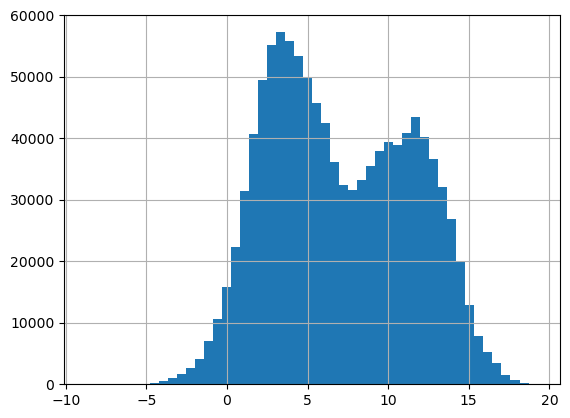

In [141]:
import pandas as pd

# Descriptive Stats
print(df_filtered['potential_temp'].describe()) 

# Histogram
df_filtered['potential_temp'].hist(bins=50)  # Adjust bin number for ideal resolution


In [142]:
def add_season_feature(df_filtered):
    conditions = [
        (df_filtered['Month'].isin([12, 1, 2])),
        (df_filtered['Month'].isin([3, 4, 5])),
        (df_filtered['Month'].isin([6, 7, 8])),
        (df_filtered['Month'].isin([9, 10, 11]))
        ]
    choices = [1, 2, 3, 4]
    df_filtered['Season'] = np.select(conditions, choices, default='Unknown')
    df_filtered['Season'] = df_filtered['Season'].astype(int)
    return df_filtered

df_filtered = add_season_feature(df_filtered.copy())

In [143]:
df_filtered

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month,potential_temp,Season
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1,7.041272,1
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9,7.311860,4
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10,6.811125,4
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11,6.637192,4
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8,7.021601,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7,3.545794,3
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5,3.572782,2
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6,3.769567,3
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4,3.321968,2


In [144]:
has_nan = df_filtered.isnull().any().any()

# Print the result
print(has_nan)


False


In [145]:
df_filtered


,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month,potential_temp,Season
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1,7.041272,1
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9,7.311860,4
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10,6.811125,4
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11,6.637192,4
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8,7.021601,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7,3.545794,3
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5,3.572782,2
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6,3.769567,3
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4,3.321968,2


In [146]:
df_filtered['month_sin'] = np.sin(2 * np.pi * df['Month']/12)
df_filtered['month_cos'] = np.cos(2 * np.pi * df['Month']/12)


In [147]:
df_filtered

,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,projection_x,projection_y,Year,Month,potential_temp,Season,month_sin,month_cos
852,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,-210000.0,-102000.0,1969,1,7.041272,1,5.000000e-01,8.660254e-01
932,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,-210000.0,-102000.0,1969,9,7.311860,4,-1.000000e+00,-1.836970e-16
933,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,-210000.0,-102000.0,1969,10,6.811125,4,-8.660254e-01,5.000000e-01
934,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,-210000.0,-102000.0,1969,11,6.637192,4,-5.000000e-01,8.660254e-01
1015,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,-210000.0,-102000.0,1969,8,7.021601,3,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.843373,8.494136,762000.0,1230000.0,2022,7,3.545794,3,-5.000000e-01,-8.660254e-01
5950876,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.732963,9.363961,762000.0,1230000.0,2022,5,3.572782,2,5.000000e-01,-8.660254e-01
5950877,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.773660,10.057385,762000.0,1230000.0,2022,6,3.769567,3,1.224647e-16,-1.000000e+00
5950959,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.559028,8.303095,762000.0,1230000.0,2022,4,3.321968,2,8.660254e-01,-5.000000e-01


C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


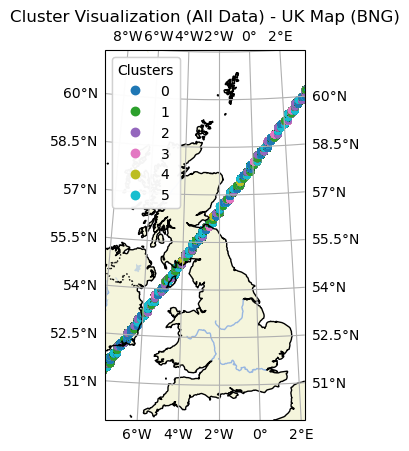

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Feature Selection
features = ['Temp', 'Rain', 'potential_temp', 'Season'] 
X = df_filtered[features]

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = 6  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
df_filtered['cluster'] = kmeans.labels_

# BNG Map Setup
bng_proj = ccrs.OSGB()
fig, ax = plt.subplots(subplot_kw=dict(projection=bng_proj))

# Background Features
ax.add_feature(cfeature.LAND, facecolor='beige')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Scatter Plot - Colored by Cluster 
scatter = ax.scatter(df_filtered['projection_x'], df_filtered['projection_y'], 
                     c=df_filtered['cluster'], s=20, cmap='tab10',
                     transform=bng_proj)

# Legend 
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Map Tuning
#ax.set_extent((-210000, 762000, -102000, 1230000)) # Replace with your extent limits
ax.gridlines(draw_labels=True) 

plt.title("Cluster Visualization (All Data) - UK Map (BNG)")
plt.show()



In [106]:
from sklearn.preprocessing import MinMaxScaler

df_filtered['label'] = (df_filtered['Year'] >= 1990).astype(int)

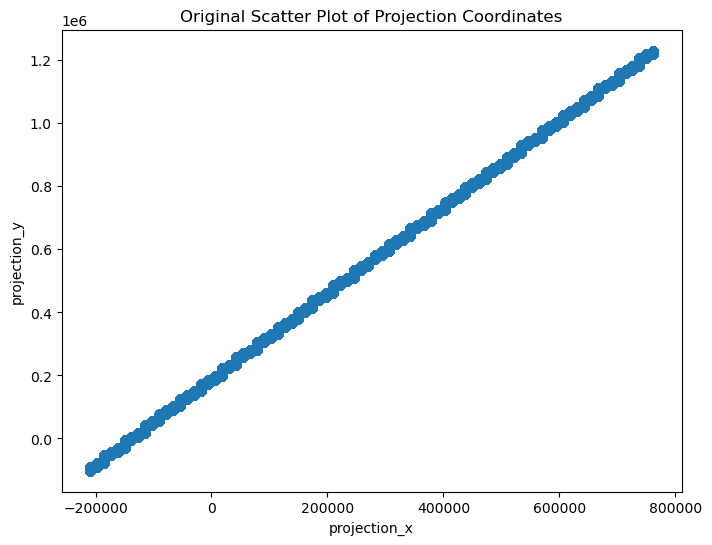

In [148]:
# Assuming your DataFrame is named 'df_filtered' 
plt.figure(figsize=(8, 6))  # Customize figure size as needed
plt.scatter(df_filtered['projection_x'], df_filtered['projection_y'])
plt.xlabel('projection_x')
plt.ylabel('projection_y')
plt.title('Original Scatter Plot of Projection Coordinates')
plt.show()

In [107]:
import pandas as pd
import numpy as np

y = (df_filtered['Year'] >= 1990).astype(int) 
df_filtered = df_filtered.drop('label', axis=1)

def reshape_multiyear(df, timesteps):
    X = []
    for i in range(len(df) - timesteps + 1):
        X.append(df.iloc[i: i + timesteps].values) 
    return np.array(X)

X = reshape_multiyear(df_filtered, timesteps=3)
print(X.shape)


(1104909, 3, 17)


In [79]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

y = y[:1104909]

class ClimateDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  
        self.y = torch.tensor(y, dtype=torch.float32)  # Cast to float32
        print(self.y.dtype)  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


# Data Splits (using scikit-learn as before)
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42) 

In [80]:
print(X_train.dtype)

float64


In [81]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Now create your datasets
train_dataset = ClimateDataset(X_train, y_train) 
val_dataset = ClimateDataset(X_val, y_val)
test_dataset = ClimateDataset(X_test, y_test)

batch_size = 32  

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) 
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

torch.float32
torch.float32
torch.float32


In [82]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2): 
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, 
                            batch_first=True, bidirectional=True)  
        self.linear = nn.Linear(hidden_size * 2, 1) 
        self.sigmoid = nn.Sigmoid()

        # Register our forward hook for hidden state extraction at initialization
        self._hidden_states_hook = self._make_hook() 

    def _make_hook(self):
        def hook(module, input, output):
            self.hidden_states.append(output[0].detach().numpy())
        return self.lstm.register_forward_hook(hook)

    def forward(self, x):
        self.hidden_states = []  # Clear before each pass

        out, _ = self.lstm(x) 
        out = out[:, -1, :] 
        out = self.linear(out)
        out = self.sigmoid(out) 
        return out, self.hidden_states 

In [83]:
import time

# Hyperparameters 
input_size = 25 
hidden_size = 64
num_layers = 2
epochs = 5 
learning_rate = 0.001 

# Instantiate Model and Set Up Optimizer
model = LSTMModel(input_size, hidden_size, num_layers) 
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Storage for tracking metrics
training_losses = []
training_accs = []
val_losses = []
val_accs = []

def calculate_accuracy(output, labels):
    preds = torch.round(torch.sigmoid(output))  
    correct = (preds.squeeze() == labels).sum().item() 
    accuracy = correct / len(labels)
    return accuracy

# Training Loop
for epoch in range(epochs):
    start_time = time.time()
    training_loss = 0.0
    training_acc = 0.0
    model.train()  # Set model in training mode 

    for batch_X, batch_y in train_dataloader:
        output, hidden_states = model(batch_X)  # Capture both output & hidden_states

        loss = criterion(output.squeeze(), batch_y)
        loss.backward()
        optimizer.step()

        training_loss += loss.item() * batch_X.size(0)  
        training_acc += calculate_accuracy(output, batch_y) * batch_X.size(0)
    
        end_time = time.time()  # Record end time for this epoch
        epoch_time = end_time - start_time

    print(f'Epoch {epoch+1} Training Time: {epoch_time:.2f} seconds')
        
    model.eval()  
    val_loss = 0.0
    val_acc = 0.0

    with torch.no_grad(): 
        for batch_X, batch_y in val_dataloader:
            output, _ = model(batch_X)  # Unpack just the output
            loss = criterion(output.squeeze(), batch_y)
            val_loss += loss.item() * batch_X.size(0)  
            val_acc += calculate_accuracy(output, batch_y) * batch_X.size(0)


    # Average across batches 
    training_loss /= len(train_dataloader.dataset) 
    training_acc /= len(train_dataloader.dataset) 
    val_loss /= len(val_dataloader.dataset) 
    val_acc /= len(val_dataloader.dataset)

    training_losses.append(training_loss)
    training_accs.append(training_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
# Outside the loop, print the very last accuracies:
print(f'\nFinal Training Accuracy: {training_accs[-1]:.4f}, Final Validation Accuracy: {val_accs[-1]:.4f}')

Epoch 1 Training Time: 211.51 seconds
Epoch 2 Training Time: 227.41 seconds
Epoch 3 Training Time: 233.38 seconds
Epoch 4 Training Time: 243.77 seconds
Epoch 5 Training Time: 229.03 seconds

Final Training Accuracy: 0.9236, Final Validation Accuracy: 0.9976


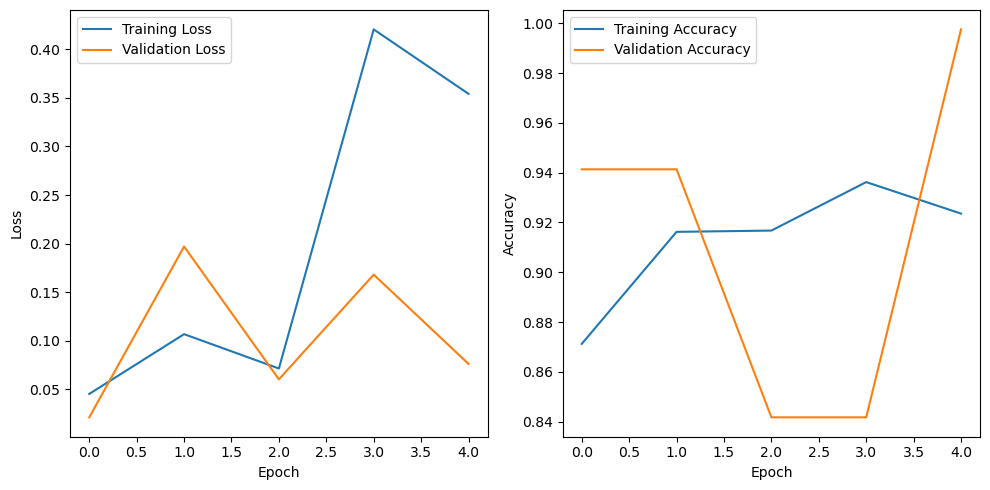

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Plot losses
plt.plot(training_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Plot accuracies
plt.plot(training_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  
plt.show()

In [85]:
model.eval()  # Put the model in evaluation mode before testing

test_loss = 0.0
test_acc = 0.0

with torch.no_grad(): 
    for batch_X, batch_y in test_dataloader:
        output, _ = model(batch_X)  # Unpacking just the model prediction
        loss = criterion(output.squeeze(), batch_y)
        test_loss += loss.item() * batch_X.size(0)  
        test_acc += calculate_accuracy(output, batch_y) * batch_X.size(0)

# Average across batches 
test_loss /= len(test_dataloader.dataset) 
test_acc /= len(test_dataloader.dataset) 

print(f'\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')



Test Accuracy: 0.9975, Test Loss: 0.0781
